In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Se apagan los warnings para evitar las alertas de posibles cambios de versión en Python3
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)

# URL address of data set
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"

# Define header of dataset, obtain this information from dataset information
header = ['letter', 'x_box', 'y_box', 'width','high','onpix','x_bar','y_bar','x2bar','y2bar','xybar','x2ybr','xy2br','x_ege','xegvy','y_ege', 'yegvx']

# load dataset as csv file
#df = pd.read_csv(url, names=header)
df = pd.read_csv("data/letter_recognition.data",header=None,names=header)

# if dataset has '?' in it, convert these into NaN
df = df.replace('?', np.nan)
# drop the NaN
df = df.dropna(axis=0, how="any")

# Print some values of the data set
df.head(5)


,letter,x_box,y_box,width,high,onpix,x_bar,y_bar,x2bar,y2bar,xybar,x2ybr,xy2br,x_ege,xegvy,y_ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [21]:
df = df[(df.letter == 'A') | (df.letter == 'E') | (df.letter == 'I') | (df.letter == 'O') | (df.letter == 'U')]
df

,letter,x_box,y_box,width,high,onpix,x_bar,y_bar,x2bar,y2bar,xybar,x2ybr,xy2br,x_ege,xegvy,y_ege,yegvx
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
11,O,6,13,4,7,4,6,7,6,3,10,7,9,5,9,5,8
16,O,3,4,4,3,2,8,7,7,5,7,6,8,2,8,3,8
23,O,6,11,7,8,5,7,6,9,6,7,5,9,4,8,5,5
36,O,4,7,5,5,3,7,7,8,6,7,6,8,3,8,3,8
39,E,3,4,3,6,2,3,8,6,10,7,6,15,0,8,7,8
41,E,3,7,4,5,4,7,7,5,8,8,8,9,3,9,6,9
62,E,6,9,4,4,2,7,7,4,7,10,6,10,1,9,7,9
67,E,2,3,3,2,2,7,7,5,7,7,6,8,2,8,5,10


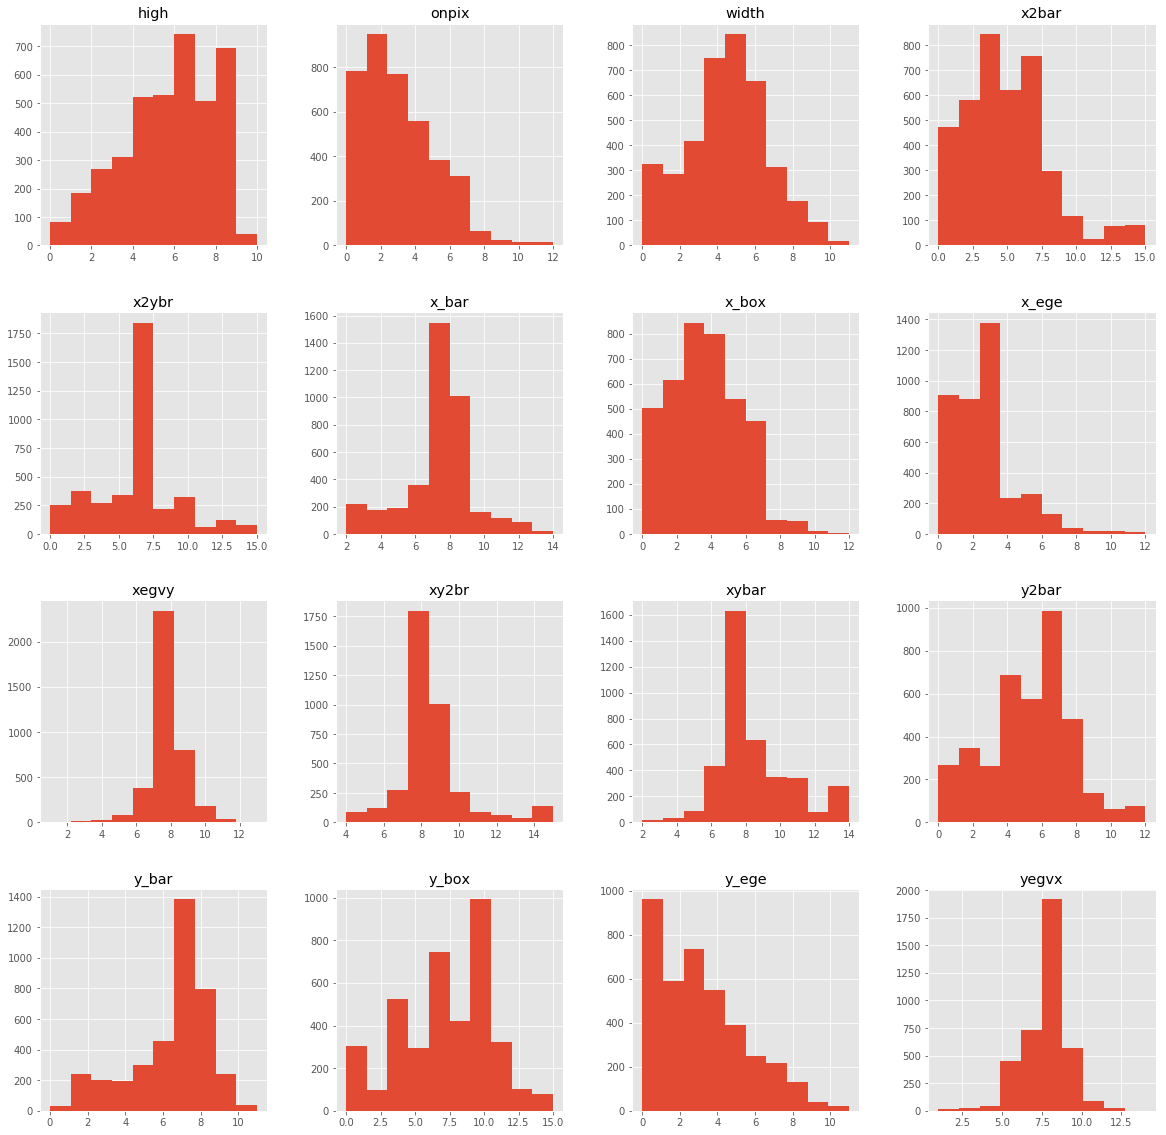

In [22]:
%matplotlib inline
#import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.DataFrame.hist(df, figsize = [20,20]);

In [23]:
from sklearn.model_selection import train_test_split

# Make a list of features only
features = ['x_box', 'y_box', 'width','high','onpix','x_bar','y_bar','x2bar','y2bar','xybar','x2ybr','xy2br','x_ege','xegvy','y_ege', 'yegvx']

# Separate features from class(es)
input_features = df.loc[:,features].values
output_class   = df.loc[:,['letter']].values
# Squeeze output into one single column
output_class = output_class.ravel()

# Separate data intro training and test sets
x_train, x_test, y_train, y_test = train_test_split(input_features, output_class, test_size=0.20, random_state=50)

In [24]:
from sklearn import neighbors

# Generate kNN model
knn = neighbors.KNeighborsClassifier(n_neighbors = 4)
# Fit the model using x_train as training data and y_train as target values
knn_model_1 = knn.fit(x_train, y_train)

# Print accuracy scores
print('k-NN accuracy for train set: %f' % knn_model_1.score(x_train, y_train))
print('k-NN accuracy for test set: %f'  % knn_model_1.score(x_test, y_test))

# Get parameters of model
knn.get_params()

k-NN accuracy for train set: 0.999355
k-NN accuracy for test set: 0.994845


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 4,
 'p': 2,
 'weights': 'uniform'}

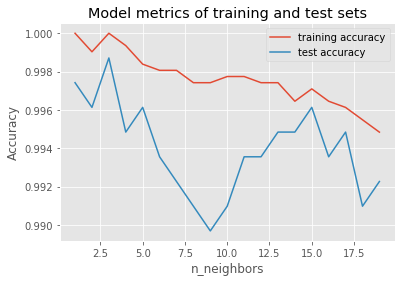

In [25]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 20)

for n_neighbors in neighbors_settings:
    # se construye el modelo de clasificacion
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(x_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(x_test, y_test))

# Plot results
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.title("Model metrics of training and test sets")
plt.legend()

[0.30443498 0.52778124 0.66355855 0.74949205 0.80869949 0.8538637
 0.8901155  0.91368788 0.93685236 0.95234255 0.96640291 0.97676916
 0.98458007 0.99134736 0.99655918 1.        ]


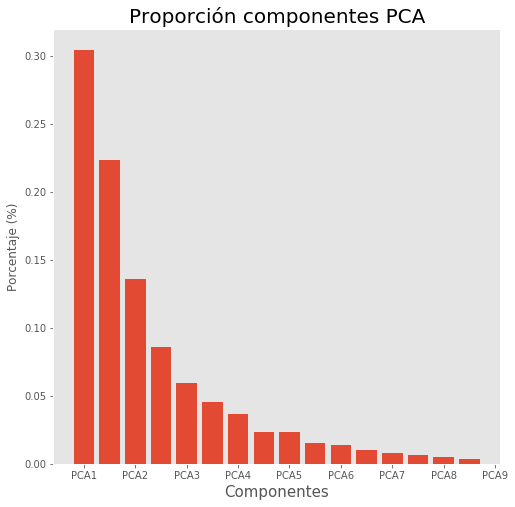

In [29]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

input_feat_scaled = StandardScaler().fit_transform(input_features)

n_atributes = input_features.shape[1]

# Se extrae el PCA y se introducen en los datos
pca = PCA(n_components = input_features.shape[1])
principalComponents = pca.fit_transform(input_features)

# Nombra cada una de las componentes del PCA
pca_features = ['PCA' + str(i) for i in range(n_atributes)]
principalDf = pd.DataFrame(data = principalComponents, columns = pca_features)

# Grafica los datos
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
#Grafica las componentes de PCA según su porcentaje
ax.bar(range(n_atributes),pca.explained_variance_ratio_)
ax.set_xlabel('Componentes', fontsize = 15)
ax.set_xticklabels(pca_features)
ax.set_ylabel('Porcentaje (%)')
ax.set_title('Proporción componentes PCA',fontsize = 20)
ax.grid()

print(pca.explained_variance_ratio_.cumsum())

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

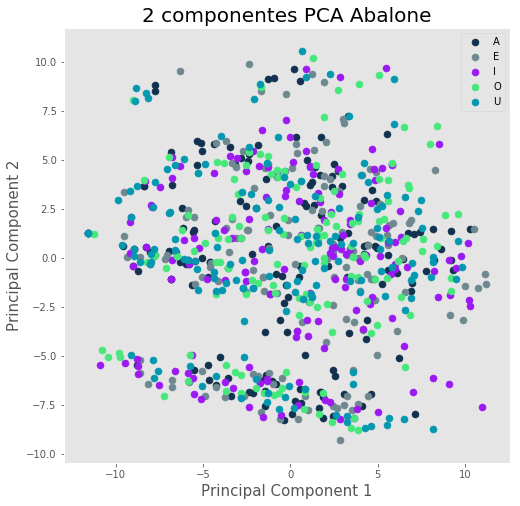

In [27]:
from sklearn.utils import column_or_1d
from sklearn import preprocessing

# Se apagan los warnings para evitar las alertas de posibles cambios de versión en Python3
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)

# Se escoge graficar solo dos componentes
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(input_features)

principalDf = pd.DataFrame(data = principalComponents)

le = preprocessing.LabelEncoder()
le.fit(df[['letter']])
targets = le.classes_.ravel()

#Se concatenan las componentes de PCA con los targets
finalDf = pd.concat([principalDf, df[['letter']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 componentes PCA Abalone', fontsize = 20)

# Para agrupar en colores los resultados se recorren toNdos los targets (29)
for target in targets:
    # Busca los indices que sean iguales al target
    indices = finalDf['letter'] == target
    # Grafica los puntos encontrados con un color aleatorio, pero igual para los del mismo target
    ax.scatter(finalDf.loc[indices, 0]
               , finalDf.loc[indices, 1]
               , c = np.random.rand(3,)
               , s = 50)
    
#Se enciende el grid y se muestra que significa cada color
ax.legend(targets)
ax.grid()